In [37]:
# import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.8.0


In [38]:
mnist = tf.keras.datasets.mnist   # 28x28 images of hand-written digits 0-9

In [39]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
# actual data pass through the neural network
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

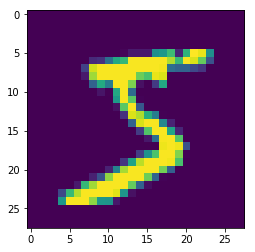

In [41]:
# image of the above data
plt.imshow(x_train[0])
plt.show()

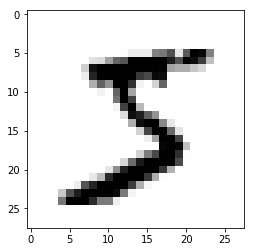

In [42]:
# binary form of above image
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [43]:
# normalize the image data to scale pixel value between 0-1 instead of 0-255
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

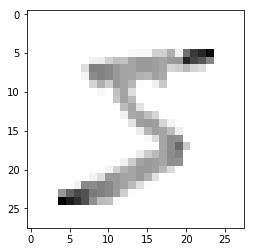

In [44]:
# actual data to pass through the neural network
print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [45]:
# Model = Sequential -> feed forward the image
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

# hidden layers -> 128 neurons in each layer with rectified linear unit as activation function
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# output layer -> 10 neurons with softmax activation function for probability distribution 
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


In [46]:
# Define parameters for the training of the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
# Run the model
model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 39s 655us/step - loss: 0.2576 - acc: 0.9253
Epoch 2/5
60000/60000 [==============================] - 11s 186us/step - loss: 0.1053 - acc: 0.9679
Epoch 3/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0708 - acc: 0.9775
Epoch 4/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.0533 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.0404 - acc: 0.9871


In [48]:
# Run the model on test set
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 7s 719us/step
0.08512217390183359 0.975


In [49]:
# Save model
model.save('number_reader.model')

In [50]:
# Load model for predictions
new_model = tf.keras.models.load_model('number_reader.model')

In [51]:
# Predictions
predictions = new_model.predict([x_test])

In [52]:
print(predictions)

[[1.50969826e-09 1.48118788e-08 1.68189581e-06 ... 9.99995708e-01
  3.33260317e-08 1.94861670e-07]
 [3.63297309e-11 2.98598820e-06 9.99996901e-01 ... 9.90881830e-08
  5.43723999e-09 3.58524462e-13]
 [2.87620344e-10 9.98697758e-01 5.25731821e-07 ... 1.29550439e-03
  1.84182386e-06 2.63263313e-08]
 ...
 [4.19764362e-11 2.09830674e-07 1.28880420e-10 ... 3.91785846e-07
  8.93005403e-09 2.62495701e-06]
 [1.88005855e-09 1.91394705e-08 1.50182575e-10 ... 1.08816955e-08
  7.70955667e-05 4.35958691e-12]
 [1.75107662e-08 6.70091849e-09 1.44441226e-09 ... 1.63420438e-12
  7.48542064e-08 4.03622163e-10]]


In [53]:
# Predict number at 0 index in the array
print(np.argmax(predictions[0]))

7


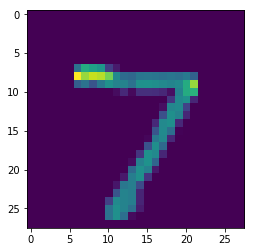

In [54]:
plt.imshow(x_test[0])
plt.show()

In [55]:
print(np.argmax(predictions[1]))

2


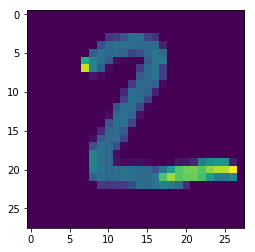

In [56]:
plt.imshow(x_test[1])
plt.show()